In [1]:
import importlib
import gptree
importlib.reload(gptree)
from gptree import *
from funcs import *
import numpy as np
import random
import gp
importlib.reload(gp)
from gp import *


In [2]:
import pandas as pd
csvfile = pd.read_csv('unknown_function.csv')
x=csvfile['x'].values
print(x.shape)
y=csvfile['y'].values
print(y.shape)

(10900,)
(10900,)


In [3]:
gp = GP(M=500, max_depth=50, prob_node_symb=0.3, depth_penalty=0.005)
res = gp.execute(x,y, generations=50)
res

Progress: 100%|██████████| 50/50 [00:12<00:00,  4.08it/s]


{'total_generations': 50,
 'best_trees': array([Node(div), Node(div), Node(div), Node(div), Node(div), Node(div),
        Node(div), Node(div), Node(div), Node(div), Node(div), Node(div),
        Node(div), Node(div), Node(div), Node(div), Node(div), Node(div),
        Node(div), Node(div), Node(div), Node(div), Node(div), Node(div),
        Node(div), Node(div), Node(div), Node(div), Node(div), Node(div),
        Node(div), Node(div), Node(div), Node(div), Node(div), Node(div),
        Node(div), Node(div), Node(div), Node(div), Node(div), Node(div),
        Node(div), Node(div), Node(div), Node(div), Node(div), Node(div),
        Node(div), Node(div), Node(div)], dtype=object),
 'best_fitness': array([429.39498648, 429.39498648, 429.39498648, 429.39498648,
         18.69899379,  18.69899379,  17.4964806 ,  12.84216115,
         11.60569566,  11.60569566,  11.60569566,   7.94677427,
          7.94677427,   7.94677427,   7.94677427,   6.49896603,
          6.15755204,   4.46984551,   4

div(x,max(log(mul(mul(x,0.7423180213045613),add(-0.3772904627975058,mul(0.152706399462484,add(-0.3772904627975058,mul(0.6557363500598812,mul(0.6557363500598812,-0.3772904627975058))))))),0.7423180213045613))


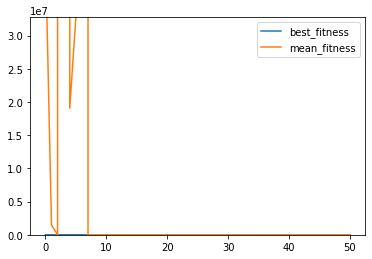

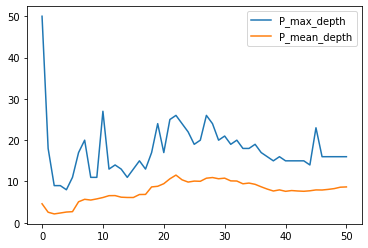

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.plot(res['best_fitness'], label='best_fitness')
plt.plot(res['mean_fitness'], label='mean_fitness')
plt.ylim(0,res['mean_fitness'][5])
plt.legend()
plt.xlabel('Generation')
plt.ylabel('Fitness')

plt.figure(figsize=(6,4))
plt.plot(res['P_max_depth'], label='P_max_depth')
plt.plot(res['P_mean_depth'], label='P_mean_depth')
plt.legend()
print(res['best_trees'][-1])
plt.xlabel('Generation')
plt.ylabel('Depth')

In [10]:
print('best fitness: \t' +  str(res['best_fitness'][-1]))
print('best fitness p:\t' +  str(res['best_fitness_p'][-1]))

best fitness: 	3.6033516665081637
best fitness p:	3.7655024915010307


In [8]:
res['best_fitness_p'][-1]

3.7655024915010307

In [6]:
#res['best_trees'][-1].sympify_str()

In [7]:
res['best_trees'][-1].pprint()


  div__________________________________________________________________________________________________________________________________________________________________________
 /                                                                                                                                                                             \
x                                                                                                                                                                             _max________
                                                                                                                                                                             /            \
                                  _________________________________________________________________________________________________________________________________________log     0.7423180213045613
                                 /
           ____________________mul____